Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data; scaricare il dataset nel formato che si preferisce.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path = input("Inserire percorso e nome del file in formato CSV--> ")
df_covid19 = pd.read_csv(path)
df_covid19.head()

Inserire percorso e nome del file in formato CSV--> /Users/alessandraferrari/Desktop/Epicode/Python/Settimana04/Esame finale/covid_data.csv


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


1) Si richiede di verificare le dimensioni del dataset e i relativi metadati.

In [3]:
df_covid19.shape

(402717, 67)

Il dataframe sotto indagine è costituito da 402.717 righe e 67 colonne

In [4]:
df_covid19.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Queste sono le etichette dei campi del dataframe in esame

In [5]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402717 entries, 0 to 402716
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402717 non-null  object 
 1   continent                                   383454 non-null  object 
 2   location                                    402717 non-null  object 
 3   date                                        402717 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

Vediamo una forte presenza di dati nulli: alcuni campi sono in larga maggioranza costituiti da dati nulli; notiamo inoltre che il tipo di dato maggiormente presente è il float. Trasformiamo il type del campo "date" da object al formato "data":

In [6]:
df_covid19["date"] = pd.to_datetime(df_covid19["date"])

In [7]:
df_covid19.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,402717,3.637120e+05,3.915260e+05,3.902960e+05,3.411170e+05,391897.000000,390667.000000,363712.000000,391526.000000,390296.000000,...,231703.000000,153356.000000,276419.000000,371154.000000,303533.000000,4.027170e+05,1.327800e+04,13278.000000,13278.000000,13278.000000
mean,2022-03-12 00:16:58.005199360,7.643621e+06,8.394802e+03,8.420935e+03,9.144834e+04,75.201461,75.435369,116280.089683,127.798851,128.194808,...,32.911524,50.790250,3.097266,73.708293,0.722516,1.291385e+08,5.569878e+04,9.782818,10.992054,1780.178018
min,2020-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-02-08 00:00:00,9.745000e+03,0.000000e+00,0.000000e+00,1.380000e+02,0.000000,0.000000,3112.311000,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.778501e+02,2.120000,-1.450000,123.163174
50%,2022-03-12 00:00:00,8.249500e+04,0.000000e+00,1.485700e+01,1.419000e+03,0.000000,0.000000,34817.949000,0.000000,3.553000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.812648e+03,8.150000,5.700000,1260.184150
75%,2023-04-12 00:00:00,9.229470e+05,0.000000e+00,3.605710e+02,1.295500e+04,0.000000,3.571000,159909.243000,0.000000,62.778250,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.901172e+04,15.027500,15.680000,2881.342550
max,2024-06-01 00:00:00,7.755224e+08,4.423623e+07,6.319461e+06,7.049617e+06,103719.000000,14817.000000,771475.000000,240325.866000,34332.267000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,383.490000,10293.515000
std,NaN,4.513264e+07,2.349982e+05,8.861835e+04,4.628774e+05,1396.538891,524.036572,163086.035446,1515.631099,561.340379,...,13.573208,31.953891,2.548281,7.394617,0.148988,6.629174e+08,1.553604e+05,12.057756,24.542748,1990.717215


Ad una prima indagine si nota che il valore massimo del campo "total_deaths" è parecchio alto rispetto allla media e alle percentili del campo; i campi "new_death" e new_deaths_smoothed", "new_cases_per_million" non hanno percentili.

In [8]:
df_covid19[df_covid19.duplicated(keep = False)]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


Non sembrano esserci righe duplicate.
Dunque creo una funzione che ci aiuti ad analizzare i valori unici contenuti in ogni colonna di un DataFrame.

In [9]:
def trova_unici(lista_colonne, df):
    for col in lista_colonne:
        valori_unici = df[col].nunique()
        if valori_unici < 500:
            print(f"La colonna {col} contiene {valori_unici} valori unici")
            if valori_unici < 10:
                print(f"Con questa frequenza: {df[col].value_counts()}")
                
trova_unici(df_covid19.columns, df_covid19)

La colonna iso_code contiene 255 valori unici
La colonna continent contiene 6 valori unici
Con questa frequenza: continent
Africa           91030
Europe           86747
Asia             79495
North America    65492
Oceania          38328
South America    22362
Name: count, dtype: int64
La colonna location contiene 255 valori unici
La colonna reproduction_rate contiene 380 valori unici
La colonna tests_units contiene 4 valori unici
Con questa frequenza: tests_units
tests performed    80099
people tested      16257
samples tested      9591
units unclear        841
Name: count, dtype: int64
La colonna population_density contiene 215 valori unici
La colonna median_age contiene 142 valori unici
La colonna aged_65_older contiene 192 valori unici
La colonna aged_70_older contiene 195 valori unici
La colonna gdp_per_capita contiene 196 valori unici
La colonna extreme_poverty contiene 76 valori unici
La colonna cardiovasc_death_rate contiene 196 valori unici
La colonna diabetes_prevalence conti

Visualizzando la presenza di valori unici e la loro frequenza si nota che i campi "iso_code" "location" e "population" sono forse legati, probabilmente il primo contiene il codice che rappresenta il nome dello Stato contenuto nel secondo ed il terzo la relativa popolazione. Si nota inoltre che i dati sono suddivisibili per 6 continenti e che il campo "tests_units" presenta solo 4 valori unici.

2) Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

In [10]:
df_covid19.groupby("continent")["total_cases"].sum()

continent
Africa           1.360475e+10
Asia             2.289547e+11
Europe           2.172971e+11
North America    1.175176e+11
Oceania          1.044462e+10
South America    6.819703e+10
Name: total_cases, dtype: float64

La funzione "groupby" esclude di suo i valori nulli; si può in caso precisare se escluderli o meno utilizzando il parametro "dropna = False/True". Il dato mostrato è poco utile perchè mostra una somma cumulativa per ogni continente, senza considerare che un malato, se conteggiato come malato per più giorni, viene sommato più e più volte, ecco il perchè dei risultati così assurdi, sarebbe meglio conteggiare i nuovi malati.

3) Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [11]:
def massimo(continente):
    df = df_covid19[df_covid19["continent"] == continente]
    return(df["total_cases"].max())

def media(continente):
    df = df_covid19[df_covid19["continent"] == continente]
    return(df["total_cases"].mean())

def percentuale(continente):
    df = df_covid19[df_covid19["continent"] == continente]
    return((df["total_cases"].sum()/df_covid19["total_cases"].sum())*100)

print("Inserire due parametri tra: Africa, Asia, Europe, North America, Oceania, South e America")
cont1 = input("Inserire parametro 1: ")
cont2 = input("Inserire parametro 2: ")
print(f"Il valore massimo di casi totali del continente {cont1} è {massimo(cont1)} e di {cont2} è {massimo(cont2)}")
print(f"La media dei casi totali del continente {cont1} è {media(cont1)} e di {cont2} è {media(cont2)}")
print(f"La percentuale rispetto al numero dei casi totali nel mondo del continente {cont1} è {percentuale(cont1)} e di {cont2} è {percentuale(cont2)}")

Inserire due parametri tra: Africa, Asia, Europe, North America, Oceania, South e America
Inserire parametro 1: Europe
Inserire parametro 2: North America
Il valore massimo di casi totali del continente Europe è 38997490.0 e di North America è 103436829.0
La media dei casi totali del continente Europe è 2762450.796226847 e di North America è 1879169.2975518494
La percentuale rispetto al numero dei casi totali nel mondo del continente Europe è 7.816228462128401 e di North America è 4.2271356268382885


Il codice scritto sopra è comunque parecchio macchinoso e si potrebbe incorrere in errori a causa dello sbagliato inserimento dei valori da parte dell'utente, (di base si dovrebbe tenere sotto controllo questo tipo di errore tramite l'uso di un Try/except inserito in un ciclo while).
Ad ogni modo trovo più adatta allo scopo la costruzione di un DataFrame che ci permetta di visionare questi dati direttamente, ad esempio:

In [14]:
conteggi = df_covid19.groupby("continent", dropna = False)["total_cases"].agg(media = "mean", massimo = "max")
conteggi

,media,massimo
continent,,
Africa,1.585248e+05,4072697.0
Asia,3.327540e+06,99357895.0
Europe,2.762451e+06,38997490.0
North America,1.879169e+06,103436829.0
Oceania,3.795285e+05,11861161.0
South America,3.183802e+06,37519960.0
NaN,1.121054e+08,775522390.0


4) Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

In [16]:
Italy = df_covid19[(df_covid19["location"] == "Italy") & (df_covid19["date"].dt.year == 2022)]

<Axes: xlabel='date', ylabel='total_cases'>

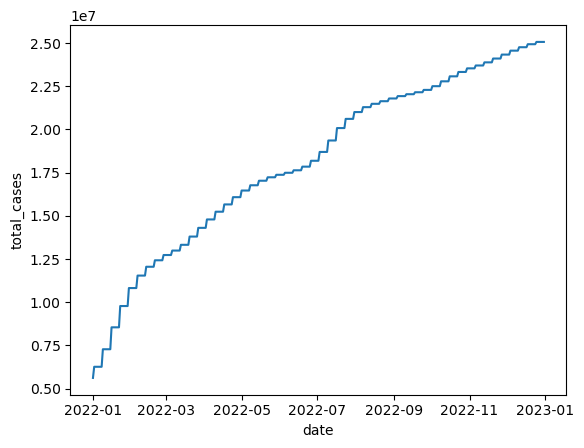

In [17]:
sns.lineplot(data = Italy, x = "date", y = "total_cases")

<Axes: xlabel='date', ylabel='new_cases'>

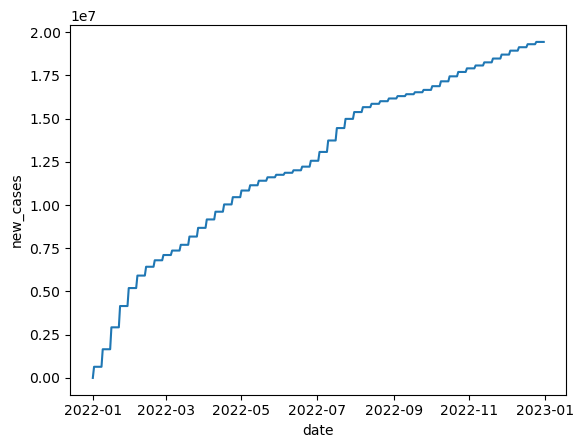

In [18]:
sns.lineplot(data = Italy, x = "date", y = Italy["new_cases"].cumsum())

<Axes: xlabel='date', ylabel='new_cases'>

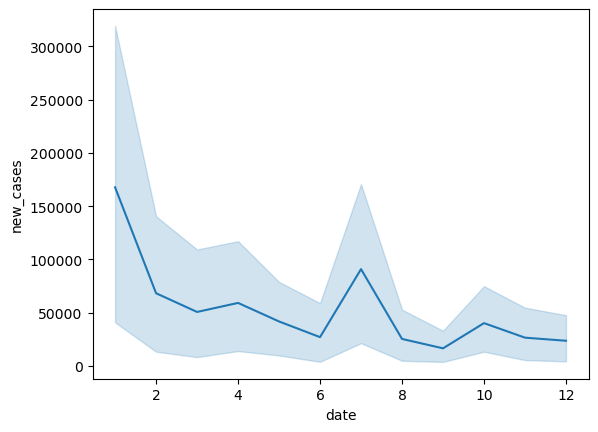

In [19]:
sns.lineplot(data = Italy, x = Italy["date"].dt.month, y = "new_cases")

Si, ci sono similarità tra l'andamento del numero dei casi totali e la somma cumulativa dei nuovi casi del 2022, anzi i grafici sembrano praticamente identici.
Ho aggiunto un grafico per visionare l'andamento dei nuovi casi nel tempo perchè mi sembrava interessante.

5)	Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo; 

<Axes: xlabel='location', ylabel='icu_patients'>

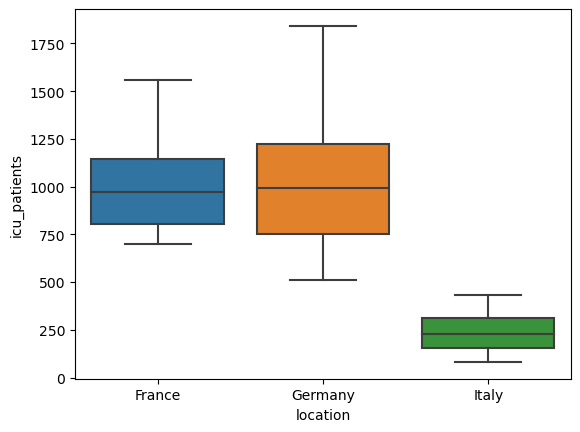

In [20]:
It_Ge_Fr = df_covid19[(df_covid19["location"].isin(["Italy", "Germany", "France"])) & (df_covid19["date"] > "2022-04-30") & (df_covid19["date"] < "2023-05-01")]
sns.boxplot(data = It_Ge_Fr, x = "location", y = "icu_patients")

Si nota la grande differenza tra Italia e le le altre due nazioni, rispetto alla quantità di pazienti in terapia intensiva durante il periodo sotto indagine.

6)	Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [21]:
It_Ge_Fr_Sp = df_covid19[(df_covid19["location"].isin(["Italy", "Germany", "France", "Spain"])) & (df_covid19["date"].dt.year == 2023)]

In [37]:
It_Ge_Fr_Sp.groupby("location")["hosp_patients"].sum()

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

<Axes: xlabel='location'>

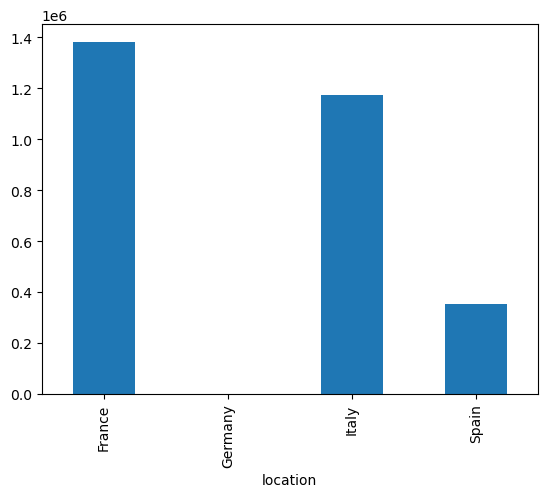

In [44]:
It_Ge_Fr_Sp.groupby("location")["hosp_patients"].sum().plot(kind = "bar")

Già si può notare che la Germania abbia conteggio zero, è dunque probabile che questa nazione presenti tutti o parecchi dati nulli:

In [28]:
It_Ge_Fr_Sp.groupby("location")["hosp_patients"].count()

location
France      90
Germany      0
Italy      365
Spain      162
Name: hosp_patients, dtype: int64

Analizzando la tabella creata sopra si nota che ad ogni nazione sotto indagine corrisponde un valore per ogni giorno dell'anno su cui stiamo indagando, sono presenti infatti 365 righe differenti per ogni nazione.
Se però per quanto riguarda l'Italia non compare alcun dato nullo, le altre nazioni ne presentano parecchi: La Germania presenta solo dati nulli e può dunque essere esclusa dall'analisi; anche Francia e Spagna presentano parecchi dati nulli.
Questo è un caso in cui i dati nulli non passono essere scambiati con una media o una mediana, o andremmo a sfalsare l'intera somma. Inoltre anche la presenza di dati nulli ci sta dando informazioni, ad esempio: la Germania nel 2023 non ha avuto ospedalizzati a causa del Covid19?